In [ ]:
### MAIN CODE

In [70]:
import pandas as pd

df = pd.read_csv('finaltable1.csv')


In [71]:
df.head()

,patientunitstayid,tf_offset,tf_postadmday,base_hb,base_lactate,patienthealthsystemstayid,gender,age,agegroup,ethnicity,...,post_sf_auc,post_sf_avg_auc,post_sf_time_span,pre_sf_auc,pre_sf_avg,pre_sf_count,pre_method,auc_change,BMI,base_hb_category
0,144297,11411,7.9,7.4,NaN,131348,Male,74,61-80,African American,...,1957.486111,164.725339,11.883333,1841.041667,165.095238,35,auc_method,116.444444,38.111136,8-Jul
1,145715,13627,9.5,8.3,1.4,132434,Male,77,61-80,African American,...,1631.702381,137.890342,11.833333,1643.761905,138.979592,49,auc_method,-12.059524,25.287409,9-Aug
2,163555,24095,16.7,6.7,0.7,146216,Male,71,61-80,Caucasian,...,2373.733333,197.811111,12.000000,2350.000000,200.000000,51,auc_method,23.733333,26.160256,7-Jun
3,168097,1138,0.8,7.4,NaN,149743,Female,69,61-80,Caucasian,...,3268.515625,297.137784,11.000000,3452.343750,302.083333,18,auc_method,-183.828125,16.685350,8-Jul
4,171083,5592,3.9,7.0,NaN,152033,Male,65,61-80,Caucasian,...,2852.812500,292.596154,9.750000,3043.776042,303.613281,32,auc_method,-190.963542,48.608097,8-Jul


In [73]:
print(df.columns.tolist())


['patientunitstayid', 'tf_offset', 'tf_postadmday', 'base_hb', 'base_lactate', 'patienthealthsystemstayid', 'gender', 'age', 'agegroup', 'ethnicity', 'hospitalid', 'admissionheight', 'hospitaladmitsource', 'hospitaldischargeyear', 'hospitaldischargeoffset', 'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype', 'unitadmitsource', 'unitvisitnumber', 'unitstaytype', 'admissionweight', 'dischargeweight', 'unitdischargestatus', 'final_charlson_score', 'chartoffset', 'heartrate', 'respiratoryrate', 'spo2', 'SBP', 'DBP', 'MBP', 'temperature', 'pre_o2_device', 'post_worst_o2_device', 'o2_device_change', 'base_fio2', 'time_from_tf', 'prepost_tf', 'sf_ratio', 'sf_ratio_category', 'sepsis', 'apachescore', 'chronically_hypoxic', 'post_tf_spo2count', 'pre_tf_spo2count', 'num_vaso', 'vaso_yn', 'avg_sf_post', 'avg_sf_pre', 'sf_change', 'post_sf_auc', 'post_sf_avg_auc', 'post_sf_time_span', 'pre_sf_auc', 'pre_sf_avg', 'pre_sf_count', 'pre_method', 'auc_change', 'BMI', 'base_hb_category']

In [77]:
df2 = df[['age', 'ethnicity', 'gender', 'apachescore', 'chronically_hypoxic', 
         'base_fio2', 'avg_sf_pre','auc_change', 'hospitaldischargestatus', 'sepsis', 'final_charlson_score', 'vaso_yn', 'base_hb', 'base_lactate']].copy()

##'o2_device_group'
##'los_minutes'

In [79]:
df2.head()

,age,ethnicity,gender,apachescore,chronically_hypoxic,base_fio2,avg_sf_pre,auc_change,hospitaldischargestatus,sepsis,final_charlson_score,vaso_yn,base_hb,base_lactate
0,74,African American,Male,72.0,0,60,165.095238,116.444444,Alive,0,8,0,7.4,NaN
1,77,African American,Male,50.0,0,70,138.979592,-12.059524,Expired,0,5,0,8.3,1.4
2,71,Caucasian,Male,55.0,0,50,200.000000,23.733333,Alive,0,6,0,6.7,0.7
3,69,Caucasian,Female,37.0,0,32,302.083333,-183.828125,Alive,0,3,0,7.4,NaN
4,65,Caucasian,Male,73.0,0,32,303.613281,-190.963542,Alive,0,6,0,7.0,NaN


In [80]:
df2.dtypes

age                          int64
ethnicity                   object
gender                      object
apachescore                float64
chronically_hypoxic          int64
base_fio2                    int64
avg_sf_pre                 float64
auc_change                 float64
hospitaldischargestatus     object
sepsis                       int64
final_charlson_score         int64
vaso_yn                      int64
base_hb                    float64
base_lactate               float64
dtype: object

In [81]:
df2['age'] = df2['age'].astype(str)

df2['age'] = df2['age'].str.strip()

df2['age'] = df2['age'].str.replace('> *89', '89', regex=True)

df2['age'] = pd.to_numeric(df2['age'], errors='coerce')

df2['age'] = df2['age'].astype(int)


In [82]:
df2.dtypes

age                          int32
ethnicity                   object
gender                      object
apachescore                float64
chronically_hypoxic          int64
base_fio2                    int64
avg_sf_pre                 float64
auc_change                 float64
hospitaldischargestatus     object
sepsis                       int64
final_charlson_score         int64
vaso_yn                      int64
base_hb                    float64
base_lactate               float64
dtype: object

In [83]:
df2['hospitaldischargestatus'].unique()

array(['Alive', 'Expired'], dtype=object)

In [84]:
df2['hospitaldischargestatus'].isna().sum()


0

In [85]:
df3 = df2.dropna(subset=['hospitaldischargestatus'])


In [86]:
df3.head()

,age,ethnicity,gender,apachescore,chronically_hypoxic,base_fio2,avg_sf_pre,auc_change,hospitaldischargestatus,sepsis,final_charlson_score,vaso_yn,base_hb,base_lactate
0,74,African American,Male,72.0,0,60,165.095238,116.444444,Alive,0,8,0,7.4,NaN
1,77,African American,Male,50.0,0,70,138.979592,-12.059524,Expired,0,5,0,8.3,1.4
2,71,Caucasian,Male,55.0,0,50,200.000000,23.733333,Alive,0,6,0,6.7,0.7
3,69,Caucasian,Female,37.0,0,32,302.083333,-183.828125,Alive,0,3,0,7.4,NaN
4,65,Caucasian,Male,73.0,0,32,303.613281,-190.963542,Alive,0,6,0,7.0,NaN


In [87]:
df3.to_csv('final_dataset_v3.csv', index=False)

In [52]:
!pip install xgboost

     ------------------------------------- 124.9/124.9 MB 11.3 MB/s eta 0:00:00


In [88]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

# 1. Encode target for classification
df2['hospitaldischargestatus_binary'] = df2['hospitaldischargestatus'].map({'Alive': 0, 'Expired': 1})

# 2. Features and targets
features = [col for col in df2.columns if col not in ['hospitaldischargestatus', 'hospitaldischargestatus_binary']]

X = df2[features]
y_classification = df2['hospitaldischargestatus_binary']
##y_regression = np.log1p(df2['los_minutes'])

# 3. One-hot encode BEFORE splitting
X = pd.get_dummies(X, drop_first=True)


In [89]:
###MODEL 1 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)


In [90]:
X_train.isna().any(axis=1).sum()


1224

In [91]:
# Drop rows in X_train and y_train that have NaNs
X_train_clean = X_train.dropna()
y_train_clean = y_train.loc[X_train_clean.index]

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_clean, y_train_clean)

best_model = grid_search.best_estimator_


C:\Users\apoor\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\apoor\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\apoor\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:14:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\apoor\anaconda3\lib\site-packages\

In [92]:
X_test.isna().any(axis=1).sum()


304

In [93]:
y_test.isna().sum()


0

In [94]:
# Drop rows in X_test that have NaNs
X_test_clean = X_test.dropna()
y_test_clean = y_test.loc[X_test_clean.index]

# Now predict
y_pred = best_model.predict(X_test_clean)
print("Test Accuracy:", accuracy_score(y_test_clean, y_pred))



Test Accuracy: 0.8375451263537906


In [95]:
# First, check unique values
print(y_classification.unique())


[0 1]


In [96]:
# 1. Drop NaNs
mask = y_classification.notna()
X_clean = X.loc[mask]
y_classification_clean = y_classification.loc[mask]

# 2. Convert to integers
y_classification_clean = y_classification_clean.astype(int)


final_model = XGBClassifier(**grid_search.best_params_, use_label_encoder=False, eval_metric='logloss')
final_model.fit(X_clean, y_classification_clean)



C:\Users\apoor\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [101]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(final_model, X_clean)

# Calculate SHAP values
shap_values = explainer(X_clean)


In [103]:
# Get mean SHAP value for auc_change
mean_shap_auc_change = shap_values.values[:, list(X_clean.columns).index('auc_change')].mean()

print(f"Mean SHAP value for auc_change: {mean_shap_auc_change:.6f}")


Mean SHAP value for auc_change: -0.010535


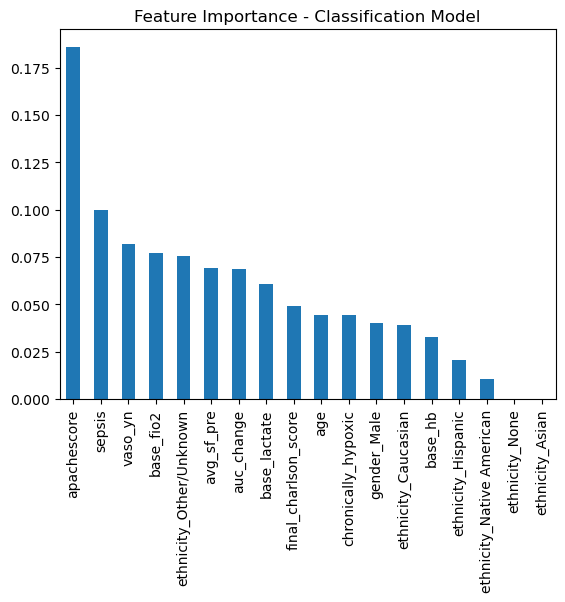

In [97]:
import matplotlib.pyplot as plt

importance = final_model.feature_importances_
feat_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)

feat_importance.plot(kind='bar')
plt.title('Feature Importance - Classification Model')
plt.show()


In [100]:
import statsmodels.api as sm
import pandas as pd

# 1. Clean your data: remove rows with NaNs/Infs
mask = (y_classification.notna()) & (~X.isna().any(axis=1)) & (~X.isin([np.inf, -np.inf]).any(axis=1))

X_logreg = X.loc[mask]
y_logreg = y_classification.loc[mask]

# 2. Add constant (intercept term)
X_logreg_const = sm.add_constant(X_logreg)

# 3. Fit the logistic regression model
logit_model = sm.Logit(y_logreg, X_logreg_const)
logit_result = logit_model.fit()

# 4. Print the full summary
print(logit_result.summary())


         Current function value: 0.397826
         Iterations: 35
                                 Logit Regression Results                                 
Dep. Variable:     hospitaldischargestatus_binary   No. Observations:                 1376
Model:                                      Logit   Df Residuals:                     1357
Method:                                       MLE   Df Model:                           18
Date:                            Sun, 27 Apr 2025   Pseudo R-squ.:                  0.1383
Time:                                    10:17:13   Log-Likelihood:                -547.41
converged:                                  False   LL-Null:                       -635.29
Covariance Type:                        nonrobust   LLR p-value:                 6.619e-28
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const             

C:\Users\apoor\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
##APPENDIX (EVERYTHING ELSE WE TRIED)

In [23]:
### MODEL 2 

In [24]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regression, test_size=0.2, random_state=42)


In [25]:
param_grid_r = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid_search_r = GridSearchCV(XGBRegressor(), param_grid_r, cv=3, scoring='neg_root_mean_squared_error')
grid_search_r.fit(X_train_r, y_train_r)

best_model_r = grid_search_r.best_estimator_


In [26]:
y_pred_r = best_model_r.predict(X_test_r)
print("Test RMSE:", mean_squared_error(y_test_r, y_pred_r, squared=False))


Test RMSE: 0.9397427450014478


In [27]:
final_model_r = XGBRegressor(**grid_search_r.best_params_)
final_model_r.fit(X, y_regression)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

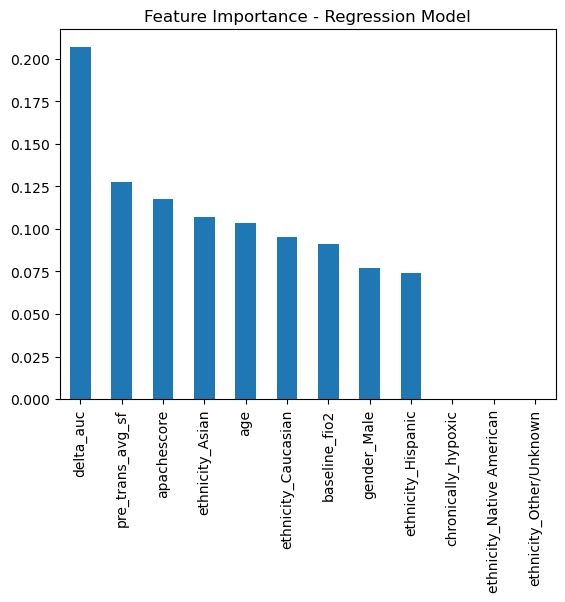

In [28]:
importance_r = final_model_r.feature_importances_
feat_importance_r = pd.Series(importance_r, index=X.columns).sort_values(ascending=False)

feat_importance_r.plot(kind='bar')
plt.title('Feature Importance - Regression Model')
plt.show()


In [30]:

import numpy as np

mean_shap_value = 0.001433
percent_change = np.expm1(mean_shap_value) * 100

print(f"Estimated % change in LOS: {percent_change:.4f}%")

"A 1-unit increase in delta_auc is associated with a 0.14% longer hospital stay (LOS), on average."

Estimated % change in LOS: 0.1434%


'A 1-unit increase in delta_auc is associated with a 0.14% longer hospital stay (LOS), on average.'

In [31]:
df3['los_minutes'].skew()


17.049613337240014

In [32]:
import numpy as np

# Take log (add 1 to avoid log(0) error)
log_los = np.log1p(df3['los_minutes'])

# Now check skewness
log_los.skew()


-0.4959982094470419

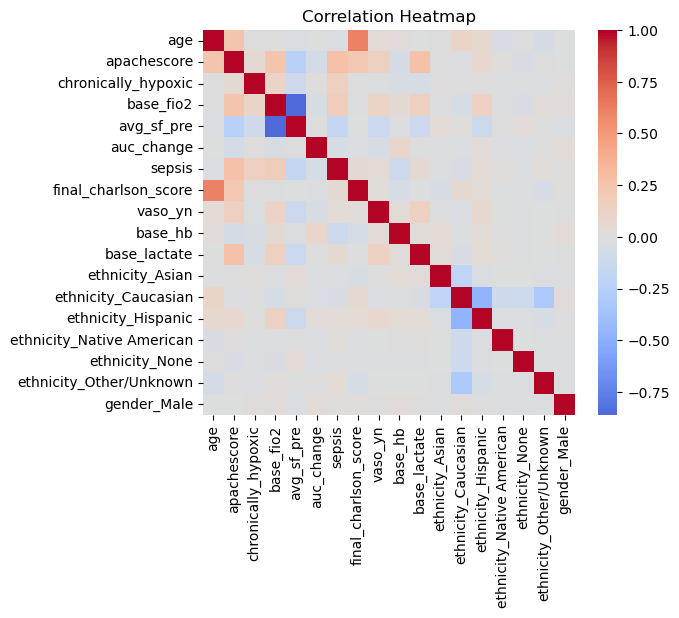

In [98]:
#Exploring multicollinearity 

import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [99]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Drop rows with NaN or Inf
X_clean = X.dropna().replace([np.inf, -np.inf], np.nan).dropna()

# Add constant
X_vif = add_constant(X_clean)

# Calculate VIF
vif = pd.DataFrame()
vif["variable"] = X_clean.columns
vif["VIF"] = [variance_inflation_factor(X_vif.values, i+1) for i in range(len(X_clean.columns))]

print(vif.sort_values('VIF', ascending=False))


                     variable       VIF
3                   base_fio2  3.743376
4                  avg_sf_pre  3.692460
0                         age  1.724906
7        final_charlson_score  1.676973
12        ethnicity_Caucasian  1.603976
13         ethnicity_Hispanic  1.367417
1                 apachescore  1.291480
16    ethnicity_Other/Unknown  1.189341
6                      sepsis  1.112410
10               base_lactate  1.112206
11            ethnicity_Asian  1.083573
5                  auc_change  1.081089
9                     base_hb  1.080294
8                     vaso_yn  1.051036
2         chronically_hypoxic  1.047043
14  ethnicity_Native American  1.033875
15             ethnicity_None  1.033848
17                gender_Male  1.011530


In [39]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Step 1: Clean your X and y_regression first
mask = (y_regression.notna()) & (~X.isna().any(axis=1)) & (~X.isin([np.inf, -np.inf]).any(axis=1))

X_linreg = X.loc[mask]
y_linreg = y_regression.loc[mask]

# Step 2: Add a constant (intercept) term
X_linreg_const = sm.add_constant(X_linreg)

# Step 3: Fit the OLS (Ordinary Least Squares) Linear Regression
linreg_model = sm.OLS(y_linreg, X_linreg_const)
linreg_result = linreg_model.fit()

# Step 4: Print the summary
print(linreg_result.summary())

# Step 5: Create a clean results table
linreg_summary = pd.DataFrame({
    'feature': X_linreg_const.columns,
    'coef': linreg_result.params,
    'p_value': linreg_result.pvalues
}).sort_values('p_value')

print(linreg_summary)


                            OLS Regression Results                            
Dep. Variable:            los_minutes   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.508
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           2.69e-18
Time:                        09:02:28   Log-Likelihood:                -3453.1
No. Observations:                2464   AIC:                             6932.
Df Residuals:                    2451   BIC:                             7008.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [40]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on the training data
y_pred_linreg = linreg_result.predict(X_linreg_const)

# Calculate RMSE
rmse = mean_squared_error(y_linreg, y_pred_linreg, squared=False)

print("Linear Regression RMSE:", rmse)


Linear Regression RMSE: 0.9826495673678647
